In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
# Set download URL
host = 'https://orca.casa.ucl.ac.uk'
path = '~jreades/data/London-2020-11-listings.csv.gz'  
url  = f'{host}/{path}'

# your code here
df = pd.read_csv(url, compression='gzip', low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 76,984 x 74


In [3]:
df.describe(percentiles=[.05,0.95]) # 0.5 is always shown

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.698400e+04,7.698400e+04,7.698400e+04,76973.000000,76973.000000,0.0,76984.000000,76984.000000,76984.000000,0.0,...,53381.000000,53432.000000,53383.000000,53382.000000,0.0,76984.000000,76984.000000,76984.000000,76984.000000,55251.000000
mean,2.562503e+07,2.020111e+13,9.517164e+07,23.595884,23.595884,NaN,51.509932,-0.128256,3.077393,NaN,...,9.653809,9.677272,9.559785,9.305253,NaN,19.734750,16.888185,2.284137,0.039904,0.654365
std,1.319053e+07,2.580876e+01,1.001727e+08,124.361055,124.361055,NaN,0.047514,0.094815,1.947671,NaN,...,0.919405,0.910233,0.861432,1.066519,NaN,98.506565,96.283112,15.342232,0.544422,0.935893
min,1.155100e+04,2.020111e+13,2.010000e+03,0.000000,0.000000,NaN,51.283370,-0.496870,1.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
5%,3.489993e+06,2.020111e+13,2.059790e+06,0.000000,0.000000,NaN,51.424203,-0.288915,1.000000,NaN,...,8.000000,8.000000,8.000000,8.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.030000
50%,2.585057e+07,2.020111e+13,4.947226e+07,1.000000,1.000000,NaN,51.514030,-0.126000,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.340000
95%,4.484062e+07,2.020111e+13,3.087316e+08,59.000000,59.000000,NaN,51.586180,0.017808,7.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,48.000000,42.000000,5.000000,0.000000,2.310000
max,4.626152e+07,2.020111e+13,3.745225e+08,1490.000000,1490.000000,NaN,51.685230,0.288570,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,878.000000,877.000000,249.000000,18.000000,48.290000


In [4]:
#### 1.2.4 Printing the Columns
print(df.columns.to_list())


['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

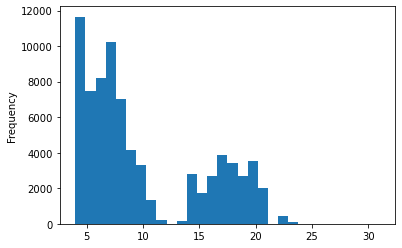

In [5]:
probs = df.isnull().sum(axis=1)
print(type(probs))       # Note that this has returned a series!
probs.plot.hist(bins=30) # Oooooooh, check out what we can do with a series!

In [6]:
df.drop(probs[probs > 5].index, inplace=True)

In [7]:
print(f"Have reduced data frame to: {df.shape[0]} rows and {df.shape[1]} columns")

Have reduced data frame to: 19112 rows and 74 columns


In [8]:
###delete the rows which  'latitude', 'longitude','price' is NA

In [9]:
df['price']

0         $97.00
1         $40.00
2         $75.00
3        $307.00
6         $65.00
          ...   
76293    $200.00
76312     $30.00
76347    $121.00
76351     $25.00
76435     $24.00
Name: price, Length: 19112, dtype: object

In [10]:
df.dropna(axis=0,
          how='any',
          thresh=None,
          subset=['id','latitude', 'longitude','price'],
          inplace=False)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20201106040109,2020-11-07,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2,2,0,0,1.48
1,13913,https://www.airbnb.com/rooms/13913,20201106040109,2020-11-07,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.67
3,17402,https://www.airbnb.com/rooms/17402,20201106040109,2020-11-06,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,f,15,15,0,0,0.36
6,33332,https://www.airbnb.com/rooms/33332,20201106040109,2020-11-07,Beautiful Ensuite Richmond-upon-Thames borough,"Walking distance to Twickenham Stadium, 35 min...",Peaceful and friendly.,https://a0.muscache.com/pictures/f78bf957-01ee...,144444,https://www.airbnb.com/users/show/144444,...,10.0,10.0,8.0,NaN,f,1,0,1,0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76293,46000710,https://www.airbnb.com/rooms/46000710,20201106040109,2020-11-07,Superior Luxury Canary Wharf Apartment,"The epitome of luxury, the Canary Wharf apartm...",The location is only 20 minutes from Central L...,https://a0.muscache.com/pictures/9f84bfb9-5634...,28917131,https://www.airbnb.com/users/show/28917131,...,10.0,10.0,10.0,NaN,t,1,1,0,0,1.00
76312,46008630,https://www.airbnb.com/rooms/46008630,20201106040109,2020-11-07,⚡️Warm double bedroom in Bethnal Green⚡️,⚡️Warm Double Room In Bethnal Green ⚡️<br /><b...,The first thing that you will realise when you...,https://a0.muscache.com/pictures/af950f69-c2aa...,319037369,https://www.airbnb.com/users/show/319037369,...,9.0,9.0,9.0,NaN,t,4,0,4,0,3.00
76347,46022255,https://www.airbnb.com/rooms/46022255,20201106040109,2020-11-07,*Prime Location Newly Renovated 1 bed modern f...,A newly renovated beautiful modern 1 bed / stu...,The flat is located within a short walk to the...,https://a0.muscache.com/pictures/11e472f4-90b6...,26816558,https://www.airbnb.com/users/show/26816558,...,10.0,10.0,10.0,NaN,f,4,4,0,0,1.00
76351,46026222,https://www.airbnb.com/rooms/46026222,20201106040109,2020-11-07,⚡️Cozy bedroom near central London.⚡️,⚡️Cozy Double Room Near London Center⚡️<br /><...,The first thing that you will realise when you...,https://a0.muscache.com/pictures/e32e59b8-530f...,319037369,https://www.airbnb.com/users/show/319037369,...,10.0,10.0,10.0,NaN,t,4,0,4,0,1.00


In [11]:
df['price']

0         $97.00
1         $40.00
2         $75.00
3        $307.00
6         $65.00
          ...   
76293    $200.00
76312     $30.00
76347    $121.00
76351     $25.00
76435     $24.00
Name: price, Length: 19112, dtype: object

In [12]:
money = ['price']

In [13]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')

Converting price


In [14]:
df=df.loc[:, ['id','latitude', 'longitude','price']]

In [15]:
df['price']

0         97.0
1         40.0
2         75.0
3        307.0
6         65.0
         ...  
76293    200.0
76312     30.0
76347    121.0
76351     25.0
76435     24.0
Name: price, Length: 19112, dtype: float64

In [16]:
df.describe()

,id,latitude,longitude,price
count,1.911200e+04,19112.000000,19112.000000,19112.000000
mean,2.442864e+07,51.510098,-0.133482,113.234826
std,1.306400e+07,0.045117,0.091383,179.600040
min,1.155100e+04,51.298490,-0.487390,8.000000
25%,1.428629e+07,51.487358,-0.189615,47.000000
50%,2.543457e+07,51.513305,-0.133140,82.000000
75%,3.574716e+07,51.536192,-0.076710,139.000000
max,4.606462e+07,51.672950,0.233400,18662.000000


In [17]:
print(f"The mean price is ${df.price.mean():0.2f}")
print(f"The median price is ${df.price.median():0.2f}")

The mean price is $113.23
The median price is $82.00


In [18]:
df['z'] = (df.price - df.price.mean()) / df.price.std()
df.z.describe().apply(lambda x: f"{x:5.5f}")

count    19112.00000
mean        -0.00000
std          1.00000
min         -0.58594
25%         -0.36879
50%         -0.17391
75%          0.14346
max        103.27818
Name: z, dtype: object

In [19]:
##visualise

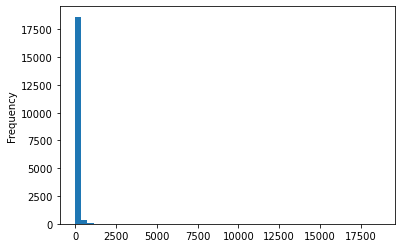

In [20]:
df.price.plot.hist(bins=50);

<AxesSubplot:ylabel='Density'>

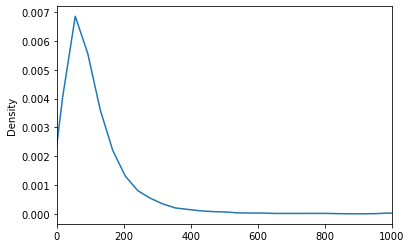

In [21]:
df.price.plot.kde(xlim=(0,1000))

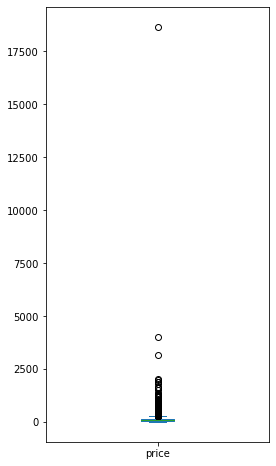

In [22]:
df.price.plot.box(figsize=(4, 8)); # boxplot

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

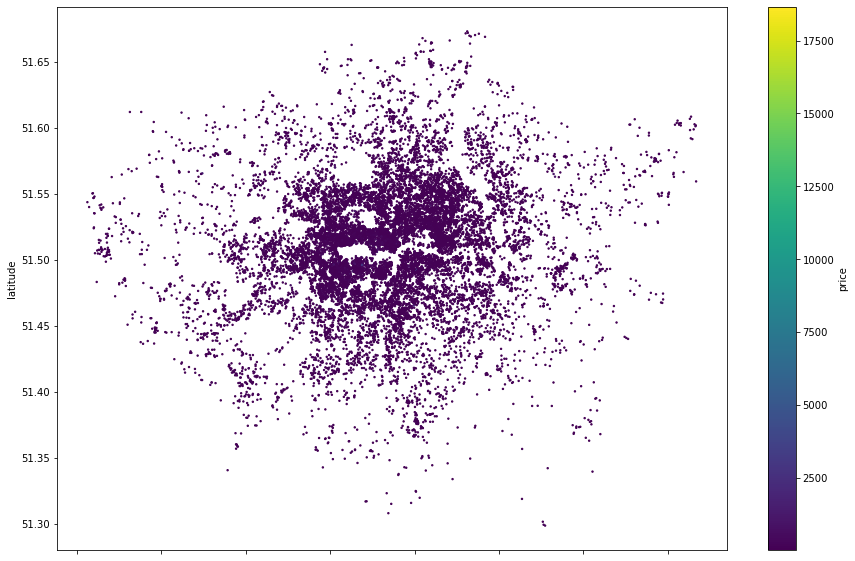

In [23]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=2, cmap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

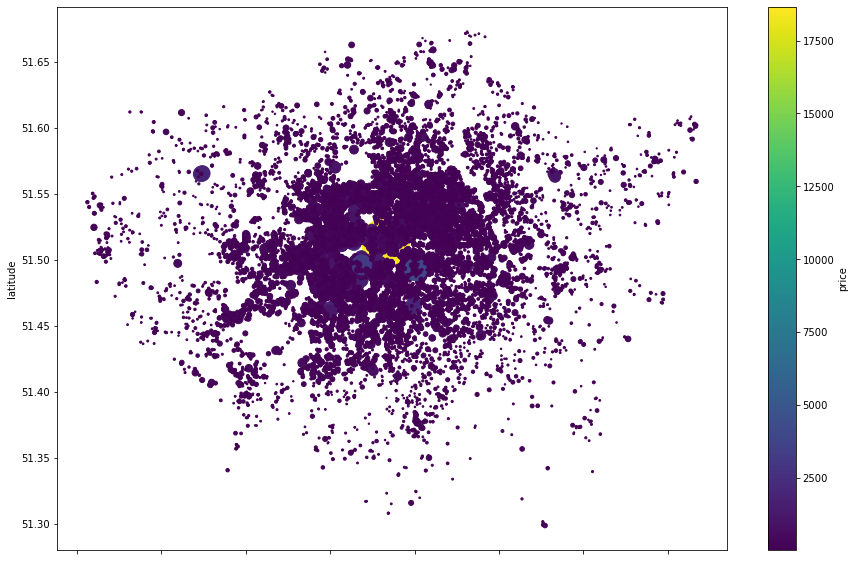

In [24]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=(df.price/df.price.min()), cmap='viridis', figsize=(15,10))

In [25]:
import geopandas as gpd
import pandas as pd

# 读取lsoa shp文件
lsoa = gpd.read_file("data/Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales/Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shp")

In [37]:
import geopandas as gpd
import pandas as pd

# 读取lsoa shp文件
lsoa = gpd.read_file("data/Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales/Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shp")

# 读取爱彼迎房价数据
data = df

# 将经纬度转换为点数据
point = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

point= point.set_crs(epsg=4326)

# 将房价数据与行政区块数据连接起来
data_lsoa = gpd.sjoin(point, lsoa)

# 汇总每个行政区块的房价均价
data_lsoa_grouped = data_lsoa.groupby("lsoa11cd").mean()


In [44]:
lsoa

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry
0,1,E01000001,City of London 001A,City of London 001A,1.333208e+05,2291.846072,"POLYGON ((-0.09726 51.52158, -0.09649 51.52028..."
1,2,E01000002,City of London 001B,City of London 001B,2.261913e+05,2433.960112,"POLYGON ((-0.08810 51.51941, -0.08927 51.51752..."
2,3,E01000003,City of London 001C,City of London 001C,5.730297e+04,1142.359799,"POLYGON ((-0.09676 51.52325, -0.09644 51.52282..."
3,4,E01000005,City of London 001E,City of London 001E,1.907388e+05,2167.868343,"POLYGON ((-0.07320 51.51000, -0.07551 51.50974..."
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,1.441958e+05,1935.510354,"POLYGON ((0.09118 51.53909, 0.09328 51.53787, ..."
...,...,...,...,...,...,...,...
34748,34749,W01001954,Cardiff 006F,Caerdydd 006F,6.471879e+05,5353.810154,"POLYGON ((-3.25546 51.52101, -3.25489 51.51968..."
34749,34750,W01001955,Swansea 025F,Abertawe 025F,6.900149e+05,5776.750473,"POLYGON ((-3.94053 51.63059, -3.93913 51.62702..."
34750,34751,W01001956,Swansea 023E,Abertawe 023E,2.493308e+06,12586.351015,"POLYGON ((-4.02465 51.63615, -4.02458 51.63574..."
34751,34752,W01001957,Swansea 025G,Abertawe 025G,2.144800e+05,2635.105196,"POLYGON ((-3.94920 51.61754, -3.94814 51.61670..."


In [36]:
data_lsoa_grouped

,id,latitude,longitude,price,z,index_right,objectid,st_areasha,st_lengths
lsoa11cd,,,,,,,,,
E01000001,2.176070e+07,51.518412,-0.096870,120.500000,0.040452,0.0,1.0,1.333208e+05,2291.846072
E01000002,2.189963e+07,51.519078,-0.092053,124.750000,0.064116,1.0,2.0,2.261913e+05,2433.960112
E01000003,2.587073e+07,51.521340,-0.095330,23.000000,-0.502421,2.0,3.0,5.730297e+04,1142.359799
E01000005,2.162326e+07,51.512606,-0.074639,101.578947,-0.064899,3.0,4.0,1.907388e+05,2167.868343
E01000006,3.431266e+07,51.539870,0.088165,28.500000,-0.471797,4.0,5.0,1.441958e+05,1935.510354
...,...,...,...,...,...,...,...,...,...
E01033742,2.134573e+07,51.496744,0.079454,62.400000,-0.283045,32817.0,32818.0,1.233092e+05,1860.310172
E01033743,3.394710e+07,51.501577,0.093325,58.000000,-0.307544,32818.0,32819.0,1.004853e+06,5237.180226
E01033744,2.115888e+07,51.494828,0.079168,82.400000,-0.171686,32819.0,32820.0,1.522620e+05,2149.370918


In [27]:
point


,id,latitude,longitude,price,z,geometry
0,11551,51.46225,-0.11732,97.0,-0.090394,POINT (-0.11732 51.46225)
1,13913,51.56802,-0.11121,40.0,-0.407766,POINT (-0.11121 51.56802)
2,15400,51.48796,-0.16898,75.0,-0.212889,POINT (-0.16898 51.48796)
3,17402,51.52195,-0.14094,307.0,1.078870,POINT (-0.14094 51.52195)
6,33332,51.46507,-0.32421,65.0,-0.268568,POINT (-0.32421 51.46507)
...,...,...,...,...,...,...
76293,46000710,51.50023,-0.02351,200.0,0.483102,POINT (-0.02351 51.50023)
76312,46008630,51.52829,-0.05167,30.0,-0.463445,POINT (-0.05167 51.52829)
76347,46022255,51.47792,-0.19445,121.0,0.043236,POINT (-0.19445 51.47792)
76351,46026222,51.52852,-0.05261,25.0,-0.491285,POINT (-0.05261 51.52852)


In [41]:
borough.crs
borough=borough.set_crs('epsg:27700',allow_override= True)
borough.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [48]:
import geopandas as gpd
import pandas as pd


# 读取borough shp文件
borough = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")

borough= borough.to_crs(epsg=27700)
# 读取爱彼迎房价数据
data = df

# 将经纬度转换为点数据
point = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.latitude, df.longitude))

point= point.set_crs(epsg=27700)

# 将房价数据与行政区块数据连接起来

data_borough = gpd.sjoin(point, borough, how="inner",predicate='within')  

In [49]:
data_borough

,id,latitude,longitude,price,z,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006


In [34]:
borough

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


In [47]:
import geopandas as gpd
import pandas as pd


# 读取borough shp文件
borough = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp",crs=27700)

# 读取爱彼迎房价数据
data = df

# 将经纬度转换为点数据
point = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

point= point.set_crs(epsg=27700)

# 将房价数据与行政区块数据连接起来
data_borough = gpd.sjoin(point, borough)
data_borough



/tmp/ipykernel_58/637097189.py:17: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...

  data_borough = gpd.sjoin(point, borough)


,id,latitude,longitude,price,z,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006


In [70]:
data_borough


,id,latitude,longitude,price,z,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt



# 创建Nominatim类
geolocator = Nominatim(user_agent="geoapiExercises")





In [ ]:
# 遍历房源，获取行政区块
lsoa_list = []
for index, row in df.iterrows():
    location = geolocator.reverse(f'{row["latitude"]}, {row["longitude"]}')
    lsoa = location.raw['address']['lsoa']
    lsoa_list.append(lsoa)

# 将行政区块添加到DataFrame中
df['lsoa'] = lsoa_list

# 分组计算房价均价
price_mean = df.groupby('lsoa')['price'].mean()

# 绘制表格
plt.figure(figsize=(20, 10))
plt.bar(price_mean.index, price_mean.values)
plt.xlabel('LSOA')
plt.ylabel('Price Mean')
plt.title('LSOA vs Price Mean')
plt.show()